---
# Evolution temporelle de la température en réacteur adiabatique isotherme isobare

*Auteur : J.Lamerenx*

---

On considère la dismutation du péroxyde d’hydrogène. Cette transformation est modélisée par la réaction d’équation :

\begin{equation}
  H_2O_2\left(aq\right)=H_2O\left(\ell\right)+\frac{1}{2}O_2\left(g\right)
\end{equation}

L’objectif est de prévoir l’évolution de la température au cours du temps dans un calorimètre de capacité thermique négligeable lors de la dismutation du péroxyde d’hydrogène, catalysée par les ions iodure.

Le protocole expérimental consiste mélanger, à l’instant t=0 :
- $30 mL$ d’une solution de péroxyde d’hydrogène à $3,5 mol \cdot L^{-1}$ 
- et $4 mL$ d’une solution d’iodure de potassium à $0,10 mol\cdot L^{-1}$.

**Données recueillies lors d’une étude expérimentale  :**

- À 24 °C, la constante de vitesse vaut $k_{297K}=5\cdot{10}^{-2}\ L\cdot mol^{-1}\cdot s^{-1}$.

- L’énergie d’activation vaut $E_a=56\ kJ\cdot mol^{-1}$.

- L’enthalpie standard de réaction vaut $\mathrm{\Delta}_rH^o=-98kJ\cdot mol^{-1}$.

- La loi de vitesse volumique est de la forme : $v=k\ \left[H_2O_2\right]\left[I^-\right]$



---

# Calculs préparatoires

---

In [18]:
#IMPORTATION DES BIBLIOTHEQUES
import numpy as np
import matplotlib.pyplot as plt


#DONNES NUMERIQUES 
R = 8.31         #constante des gaz parfaits en J/K/mol
c_eau = 4.2      #capacité thermique massique de l'eau en J/K/g
rho_eau = 1E3    #masse volumique de l'eau en g/L
Ea = 56E3        #énergie d'activation en J/mol
DrHo = -98E3     #enthalpie standard de réaction en J/mol
delta_t = 1E-1   #pas de temps pour la méthode d'Euler en s


#DONNEES RELATIVES AU PROTOCOLE EXPERIMENTAL
T0 = 297         #température initiale en K
k0 = 5E-2        #valeur de la constante de vitesse à T0 en L/mol/s
C_H2O2_s = 3.5   #concentration en H2O2 dans solution stock en mol/L
V_H2O2 = .03     #volume introduit d'eau oxygénée en L
C_KI_s = 0.1     #concentration en KI dans la solution stock en mol/L
V_KI = 4E-3      #volume introduit de la solution d'iodure de potassium en L


#CALCULS SUR L'ETAT INITIAL
Vtot = V_H2O2 + V_KI           #volume total supposé constant
n0 = C_H2O2_s * V_H2O2         #quantité de matière initiale H2O2 dans mélange
CKI = C_KI_s * V_KI / Vtot     #concentration I- dans le mélange (constante)
Capa = rho_eau * Vtot * c_eau  #capacité thermique du milieu (constante)


#DEFINITION DE FONCTIONS
def k(Temp) :
  return k0 * np.exp(Ea/R * (1/T0 - 1/Temp))
  #calcule la valeur de la constante de vitesse à une température T

def Temp(avct) :
  return T0 - DrHo/Capa * avct
  #calcule la valeur de la température pour un avancement en qt de matière "avct"

---

# Méthode d'intégration d'Euler

---

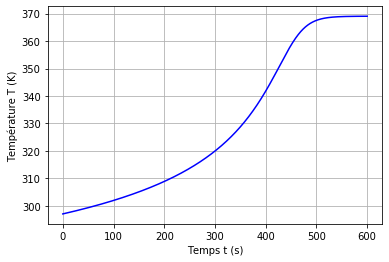

In [19]:
#CREATION DE LISTES
t = [0]               #Liste des temps
ksi = [0]             #Liste des avancements en mol
CH2O2 = [n0 / Vtot]   #Liste des concentrations en H2O2
T = [T0]              #Liste des températures


#BOUCLE D'INTEGRATION
while t[-1] < 600 and CH2O2[-1]>0 :
  new_ksi = ksi[-1] + k(T[-1]) * CH2O2[-1] * CKI * Vtot * delta_t
  ksi.append(new_ksi)
  CH2O2.append( (n0 - new_ksi) / Vtot )
  T.append(Temp(new_ksi))
  t.append(t[-1] + delta_t)


#CREATION D'UN GRAPHIQUE
plt.figure(1)
plt.plot(t,T,'b-')
plt.xlabel('Temps t (s)')
plt.ylabel('Température T (K)')
plt.grid(True)
plt.show()

---

# Méthode d'intégration utilisant `odeint`

---

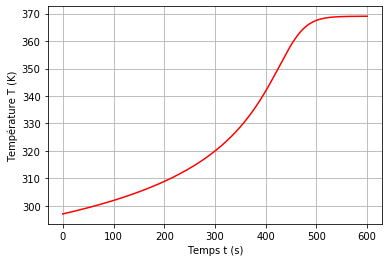

In [23]:
#IMPORTATION DES BIBLIOTHEQUES
from scipy.integrate import odeint


#DEFINITION DE FONCTIONS
def f(X,t):
  T,ksi = X
  return -DrHo/Capa * k(T) * (n0 - ksi) * CKI , k(T) * (n0 - ksi) * CKI
  #renvoie la dérivée de T et de ksi par rapport au temps  

    
#BOUCLE D'INTEGRATION
t_ode = np.linspace(0,600,600)
T_ode = odeint(f,[297,0],t_ode)[:,0]


#CREATION D'UN GRAPHIQUE
plt.figure(3)
plt.plot(t_ode,T_ode,'r-')
plt.xlabel('Temps t (s)')
plt.ylabel('Température T (K)')
plt.grid(True)
plt.show()

---

# Comparaison Euler vs `odeint`

---

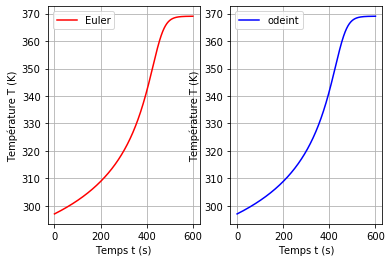

In [21]:
plt.figure(4)
plt.subplot(121)
plt.plot(t,T,'r-',label='Euler')
plt.xlabel('Temps t (s)')
plt.ylabel('Température T (K)')
plt.grid(True)
plt.legend()

plt.subplot(122)
plt.plot(t_ode,T_ode,'b-',label='odeint')
plt.xlabel('Temps t (s)')
plt.ylabel('Température T (K)')
plt.grid(True)
plt.legend()

plt.show()

---

# Comparaison avec les données expérimentales

---

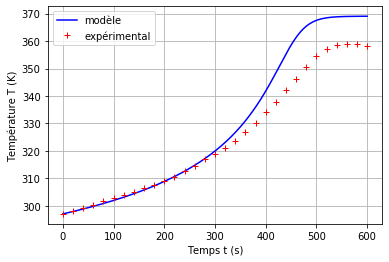

In [22]:
#COMPARAISON AVEC LES DONNES EXPERIMENTALES
tps_exp=[20*i for i in range(0,31)]
Temp_exp=np.array([24,25,26,27.2,28.6,29.9,31,32.1,33.3,34.6,36,37.6,39.5,41.5,44,45.9,48.2,50.7,53.8,57.2,61.3,64.8,69,73.2,77.6,81.6,84,85.6,86.1,86.1,85.3])
Temp_exp_K=Temp_exp+273

plt.figure(2)
plt.plot(t,T,'b-',label='modèle')
plt.plot(tps_exp,Temp_exp_K,'r+',label='expérimental')
plt.xlabel('Temps t (s)')
plt.ylabel('Température T (K)')
plt.grid(True)
plt.legend()
plt.show()